<a href="https://colab.research.google.com/github/Aarav-H/FM-Assignment/blob/main/regression-notebooks/CPCL_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [ ]:
#Download stock prices for the security monthly data last 5 years
CPCL_df = yf.download('CHENNPETRO.NS',
                      start='2019-04-06',
                      end='2024-04-06',
                      progress=False,interval ='1mo'
)
CPCL_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,253.550003,259.200012,204.649994,220.850006,204.894791,13656239
2019-06-01,224.399994,227.500000,205.000000,208.100006,193.065903,7242973
2019-07-01,209.500000,209.800003,176.000000,197.399994,183.138916,6747681
2019-08-01,195.699997,204.300003,183.000000,192.850006,178.917648,2856104
2019-09-01,192.850006,198.000000,161.050003,173.800003,161.243896,3991503


In [ ]:
#Download Market index closing prices
NIFTY_df = yf.download('^NSEI',start='2019-04-06',
                      end='2024-04-06',
                      progress=False,interval ='1mo',
)
NIFTY_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,11725.549805,12041.150391,11108.299805,11922.799805,11922.799805,8645600
2019-06-01,11953.750000,12103.049805,11625.099609,11788.849609,11788.849609,6788000
2019-07-01,11839.900391,11981.750000,10999.400391,11118.000000,11118.000000,9988500
2019-08-01,11060.200195,11181.450195,10637.150391,11023.250000,11023.250000,11153100
2019-09-01,10960.950195,11694.849609,10670.250000,11474.450195,11474.450195,12210000


In [ ]:
#Calculate Log returns(HPCL)
CPCL_df['Return_CPCL'] = np.log(CPCL_df['Adj Close']/CPCL_df['Adj Close'].shift(1))
print(CPCL_df['Return_CPCL'])

Date
2019-05-01         NaN
2019-06-01   -0.059465
2019-07-01   -0.052787
2019-08-01   -0.023319
2019-09-01   -0.104008
2019-10-01   -0.094045
2019-11-01   -0.229962
2019-12-01   -0.017252
2020-01-01    0.009265
2020-02-01   -0.208812
2020-03-01   -0.513629
2020-04-01    0.030897
2020-05-01   -0.131589
2020-06-01    0.348790
2020-07-01    0.026702
2020-08-01    0.008123
2020-09-01   -0.153011
2020-10-01    0.110424
2020-11-01    0.104711
2020-12-01    0.221036
2021-01-01   -0.161444
2021-02-01    0.097562
2021-03-01    0.000999
2021-04-01    0.098799
2021-05-01    0.170111
2021-06-01    0.106657
2021-07-01   -0.244285
2021-08-01   -0.061857
2021-09-01    0.129155
2021-10-01    0.004085
2021-11-01   -0.159669
2021-12-01   -0.018340
2022-01-01    0.074143
2022-02-01   -0.096804
2022-03-01    0.240628
2022-04-01    0.782815
2022-05-01    0.007136
2022-06-01    0.108874
2022-07-01   -0.127718
2022-08-01    0.056182
2022-09-01   -0.209970
2022-10-01   -0.118262
2022-11-01    0.033454
2022-1

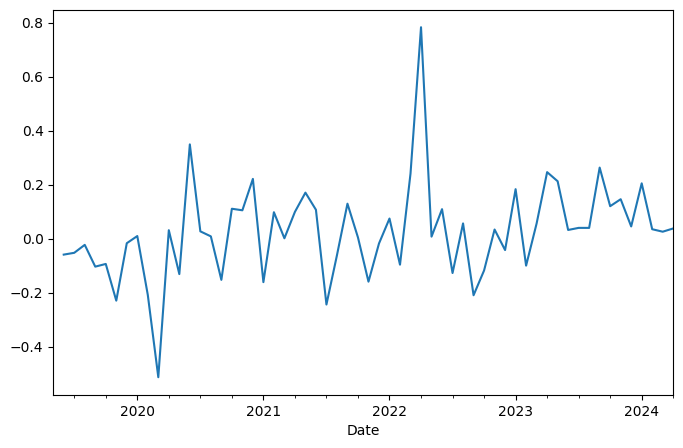

In [ ]:
CPCL_df['Return_CPCL'].plot(figsize=(8,5))
plt.show()

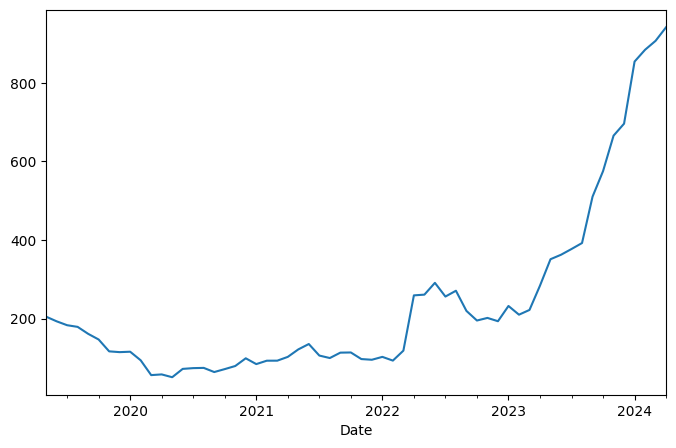

In [ ]:
CPCL_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
CPCL_df1 = CPCL_df.dropna(axis=0)
CPCL_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_CPCL
Date,,,,,,,
2019-06-01,224.399994,227.500000,205.000000,208.100006,193.065903,7242973,-0.059465
2019-07-01,209.500000,209.800003,176.000000,197.399994,183.138916,6747681,-0.052787
2019-08-01,195.699997,204.300003,183.000000,192.850006,178.917648,2856104,-0.023319
2019-09-01,192.850006,198.000000,161.050003,173.800003,161.243896,3991503,-0.104008
2019-10-01,176.250000,185.899994,151.000000,158.199997,146.770905,5659967,-0.094045


In [ ]:
#Caclulate log returns(NIFTY50)
NIFTY_df['Return_NIFTY'] = np.log(NIFTY_df['Adj Close']/NIFTY_df['Adj Close'].shift(1))
print(NIFTY_df['Return_NIFTY'])

Date
2019-05-01         NaN
2019-06-01   -0.011298
2019-07-01   -0.058589
2019-08-01   -0.008559
2019-09-01    0.040116
2019-10-01    0.034519
2019-11-01    0.014925
2019-12-01    0.009280
2020-01-01   -0.017103
2020-02-01   -0.065673
2020-03-01   -0.264569
2020-04-01    0.136976
2020-05-01   -0.028767
2020-06-01    0.072639
2020-07-01    0.072203
2020-08-01    0.027966
2020-09-01   -0.012366
2020-10-01    0.034503
2020-11-01    0.107904
2020-12-01    0.075195
2021-01-01   -0.025142
2021-02-01    0.063546
2021-03-01    0.011058
2021-04-01   -0.004065
2021-05-01    0.063018
2021-06-01    0.008861
2021-07-01    0.002639
2021-08-01    0.083291
2021-09-01    0.027970
2021-10-01    0.003032
2021-11-01   -0.039737
2021-12-01    0.021601
2022-01-01   -0.000819
2022-02-01   -0.031992
2022-03-01    0.039169
2022-04-01   -0.020957
2022-05-01   -0.030756
2022-06-01   -0.049712
2022-07-01    0.083720
2022-08-01    0.034430
2022-09-01   -0.038161
2022-10-01    0.052301
2022-11-01    0.040590
2022-1

In [ ]:
NIFTY_df1 = NIFTY_df.dropna(axis=0)
NIFTY_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2019-06-01,11953.750000,12103.049805,11625.099609,11788.849609,11788.849609,6788000,-0.011298
2019-07-01,11839.900391,11981.750000,10999.400391,11118.000000,11118.000000,9988500,-0.058589
2019-08-01,11060.200195,11181.450195,10637.150391,11023.250000,11023.250000,11153100,-0.008559
2019-09-01,10960.950195,11694.849609,10670.250000,11474.450195,11474.450195,12210000,0.040116
2019-10-01,11515.400391,11945.000000,11090.150391,11877.450195,11877.450195,15461000,0.034519


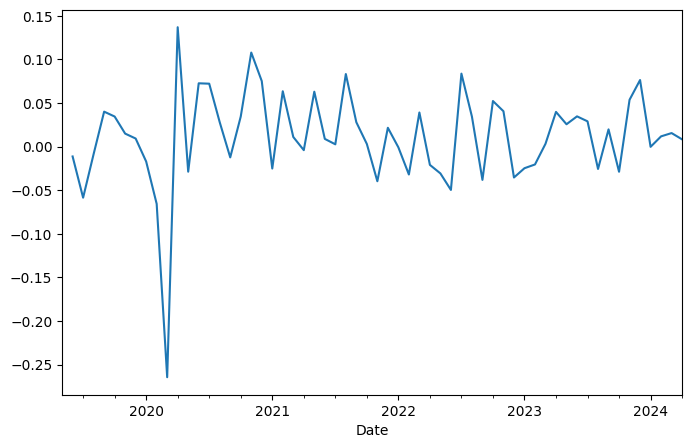

In [ ]:
NIFTY_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

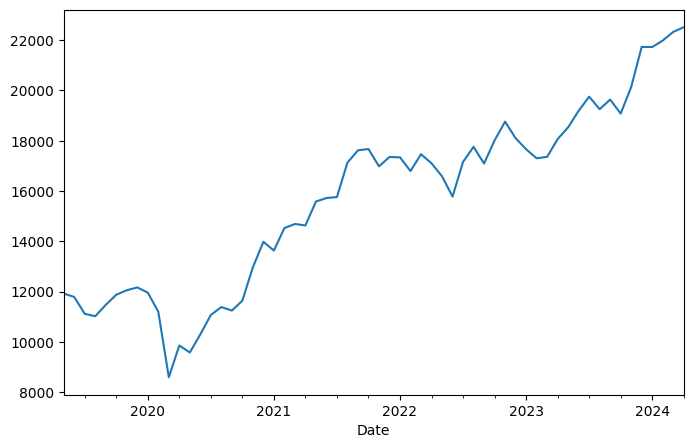

In [ ]:
NIFTY_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
CPCL_df1_returns = CPCL_df1['Return_CPCL']
CPCL_df1_returns.head()

Date
2019-06-01   -0.059465
2019-07-01   -0.052787
2019-08-01   -0.023319
2019-09-01   -0.104008
2019-10-01   -0.094045
Name: Return_CPCL, dtype: float64

In [ ]:
NIFTY_df1_returns = NIFTY_df1['Return_NIFTY']
NIFTY_df1_returns.head()

Date
2019-06-01   -0.011298
2019-07-01   -0.058589
2019-08-01   -0.008559
2019-09-01    0.040116
2019-10-01    0.034519
Name: Return_NIFTY, dtype: float64

In [ ]:
returns = pd.merge(NIFTY_df1_returns,CPCL_df1_returns,how='inner',on='Date')
returns.head()
returns.describe()

,Return_NIFTY,Return_CPCL
count,59.000000,59.000000
mean,0.010774,0.025845
std,0.055822,0.179165
min,-0.264569,-0.513629
25%,-0.020723,-0.077951
50%,0.011058,0.030897
75%,0.039495,0.107766
max,0.136976,0.782815


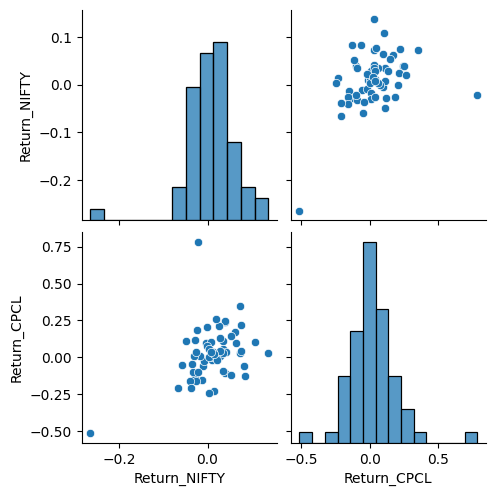

In [ ]:
sns.pairplot(returns)
plt.show()

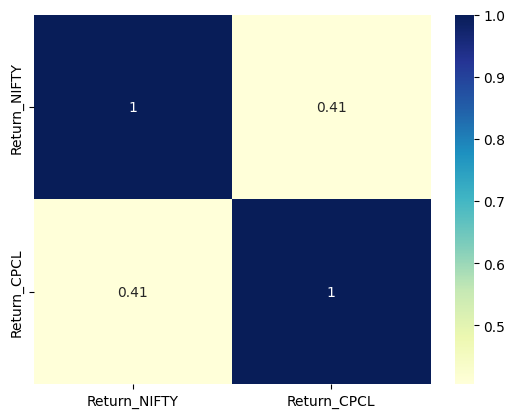

In [ ]:
sns.heatmap(returns.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
x = returns['Return_NIFTY']
y = returns['Return_CPCL']
x_sm = sm.add_constant(x)

Assumptions of OLS regression A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters The independent variables are not highly correlated with each other - no multicollinearity The variance of the residuals is constant - no heteroskedasticity Random sampling of observation and no autocorrelation Assumption of Normality of Errors Ri = αi + βi(RM) + εi.........Market model • Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

In [ ]:
#Regression - Market model
model = sm.OLS(y,x_sm)

OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [ ]:
results = model.fit()

In [ ]:
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_CPCL   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     11.19
Date:                Sun, 07 Apr 2024   Prob (F-statistic):            0.00146
Time:                        08:47:27   Log-Likelihood:                 23.524
No. Observations:                  59   AIC:                            -43.05
Df Residuals:                      57   BIC:                            -38.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0118      0.022      0.540      0.591      -0.032       0.056
Return_NIFTY     1.3004      0.389      3.346      0.001       0.522       2.079
==============================================================================
Omnibus:                       42.070   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.248
Skew:                           1.886   Prob(JB):                     2.66e-40
Kurtosis:                      10.740   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Beta for CPCL stock=1.3004 and significant at 5%

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2019-06-01 to 2024-04-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  59 non-null     float64
 1   Return_CPCL   59 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


<Axes: xlabel='Return_NIFTY', ylabel='Return_CPCL'>

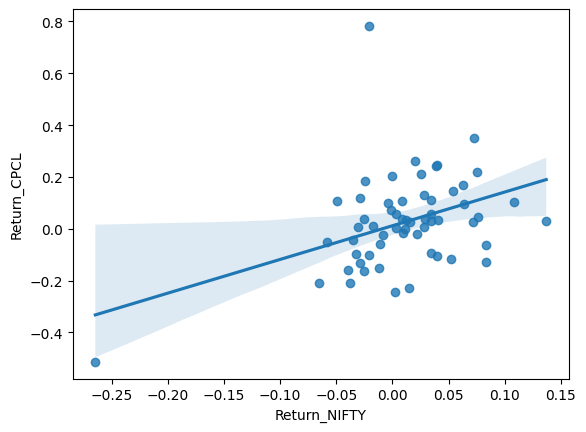

In [ ]:
#Regression - Security Characteristic line
returns.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_CPCL', data = returns)

In [ ]:
print('resid', results.resid)

resid Date
2019-06-01   -0.056608
2019-07-01    0.011565
2019-08-01   -0.024025
2019-09-01   -0.168008
2019-10-01   -0.150767
2019-11-01   -0.261205
2019-12-01   -0.041155
2020-01-01    0.019670
2020-02-01   -0.135248
2020-03-01   -0.181429
2020-04-01   -0.159056
2020-05-01   -0.106016
2020-06-01    0.242498
2020-07-01   -0.079022
2020-08-01   -0.040078
2020-09-01   -0.148765
2020-10-01    0.053722
2020-11-01   -0.047439
2020-12-01    0.111421
2021-01-01   -0.140585
2021-02-01    0.003093
2021-03-01   -0.025215
2021-04-01    0.092250
2021-05-01    0.076330
2021-06-01    0.083299
2021-07-01   -0.259552
2021-08-01   -0.182000
2021-09-01    0.080949
2021-10-01   -0.011693
2021-11-01   -0.119832
2021-12-01   -0.058265
2022-01-01    0.063372
2022-02-01   -0.067039
2022-03-01    0.177860
2022-04-01    0.798232
2022-05-01    0.035295
2022-06-01    0.161683
2022-07-01   -0.248419
2022-08-01   -0.000425
2022-09-01   -0.172181
2022-10-01   -0.198108
2022-11-01   -0.031162
2022-12-01   -0.008358


<ipython-input-26-a89ebdceef41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid)


count    5.900000e+01
mean     4.057489e-18
std      1.638019e-01
min     -2.612048e-01
25%     -9.576235e-02
50%     -9.985561e-03
75%      7.017419e-02
max      7.982317e-01
dtype: float64

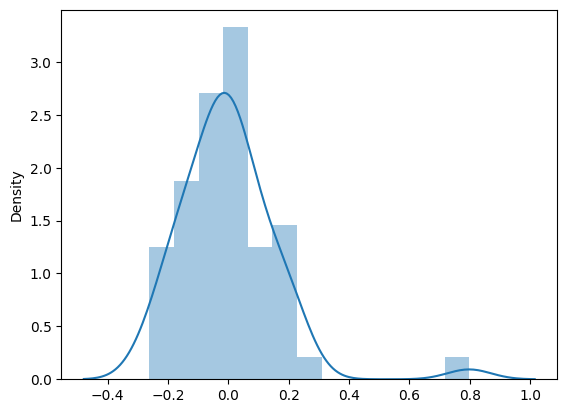

In [ ]:
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 0.34117883384620473, 'Test Statistic p-value': 0.8431676927970381, 'F-Statistic': 0.16285713142162178, 'F-Test p-value': 0.850113554560237}


The errors are homoskedastic as per the White test

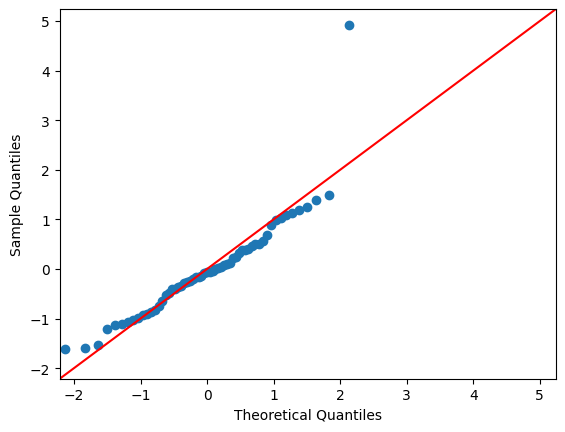

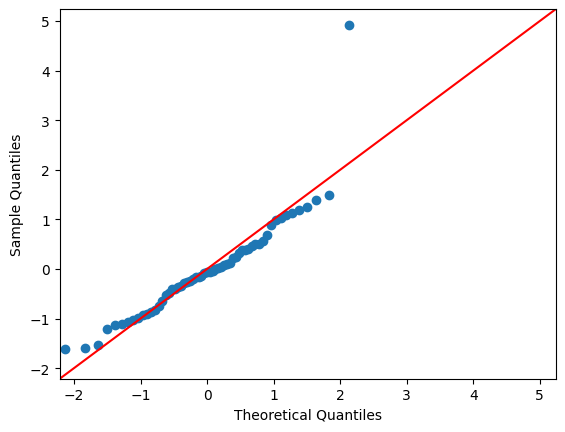

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

In [ ]:
stats.normaltest(results.resid)

NormaltestResult(statistic=42.06956079806059, pvalue=7.32336946075681e-10)